<h1 align="center"> Red Wine Quality </h1>
<br>The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: (https://www.vinhoverde.pt/en/) or the reference [Cortez et al., 2009]. Due to privacy and logistical issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g., there is no data about grape types, wine brand, wine selling price, etc.).</br>

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>About The Dataset </li>
        &nbsp;&nbsp;Acquire Data
        <li>Data Wrangling </li>
        <dd>&nbsp;&nbsp;Correcting by Dropping duplicated rows</dd>
        <dd>&nbsp;&nbsp;Normal Distribution Test </dd> 
        <dd>&nbsp;&nbsp;Cleaning of The Outliers </dd>
        <dd>&nbsp;&nbsp;Transforms Data Into a Normal Distribution </dd>
        <dd>&nbsp;&nbsp;Multicollinearity check </dd>
        <dd>&nbsp;&nbsp;Classifying </dd>
        <dd>&nbsp;&nbsp;Handeling Imbalanced Data </dd>
        <li>Model, predict and solve</li> 
        <dd>&nbsp;&nbsp; Dataset Train/Test Split</dd>
        <dd>&nbsp;&nbsp; Logistic Regression</dd>
        <dd>&nbsp;&nbsp; Dicision Tree</dd>
        <dd>&nbsp;&nbsp; SVC with Gaussian RBF Kernel</dd>
        <dd>&nbsp;&nbsp; Random Forest</dd>
        <li>Model evaluation</li>
        <li>References</li>

<h2> About The Dataset </h2>

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):

|    |             |
| ---| ----------- |
|1   | - fixed acidity|
|2   | - volatile acidity|
|3   | - citric acid|
|4   | - residual sugar|
|5   | - chlorides|
|6   | - free sulfur dioxide|
|7   | - total sulfur dioxide|
|8   | - density|
|9   | - pH|
|10  | - sulphates|
|11  | - alcohol|

Output variable (based on sensory data):

|    |             |
| ---| ----------- |
|12  | - quality (score between 0 and 10)|

**Question and problem definition**
<br>Knowing which physiochemical properties make a wine "good" from a training set of samples' physiochemicals. We also want to develop some early understanding about the domain of our problem.</br>

In [1]:
#install the opendatasets package
#!pip install opendatasets

In [2]:
#data analysis and wrangling
import opendatasets as od
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

This function is to plot the confusion matrix.

In [3]:
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Positive']) 
    plt.show() 

## - Acquire Data

In [5]:
#download the datasets
#od.download('https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/download?datasetVersionNumber=2')

In [6]:
#read the input data
df = pd.read_csv('red-wine-quality-cortez-et-al-2009\winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#display the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Continous Data**: fixed acidity, volatile acidity, citric acid , residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol 
<br>**Discreate Data**: quality</br>

## Assumption based on data 

**Correlating.**
<br>We want to know how well each feature correlates with a good wine. We want to do this early in our project and match these quick correlations with modeled correlations later in the project.</br>

**Converting.**
<br>For the modeling stage, one needs to prepare the data. It is a continuous distribution. Data satisfying the normal distribution is beneficial for model building.</br>

**Correcting.**
<br>If the duplicated rows are highly incomplete or contain many null values in both the training and test datasets, they may be dropped. </br>

**Classifying.**
<br>Turn the 10-point scale to the dichotomous variable (good and bad), and the rule code is as follows: </br>
<br><center> quality > 6.5 => "good"</center></br>


 ## Data Wrangling 

In [8]:
#check for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## -  Correcting by Dropping duplicated rows 

In [9]:
#the duplicated rows are cleaned in this part
#calculate duplicates
print('Data frame shape before duplicate cleaning', df.shape)
dups = df.duplicated()
#report if there are any duplicates
print('any duplicates:', dups.any())
#delete duplicate rows
df.drop_duplicates(inplace=True)
print('Data frame shape after duplicate cleaning',df.shape)

Data frame shape before duplicate cleaning (1599, 12)
any duplicates: True
Data frame shape after duplicate cleaning (1359, 12)


## - Normal Distribution Test

In [10]:
from scipy import stats
from scipy.stats import normaltest

In [11]:
#test for a normal distribution
#This function tests the null hypothesis that a sample comes from a normal distribution. 
for i in df.columns.values:
    a,b = stats.normaltest(df[[i]])
    alpha = 0.5
    print('p-value for',[i],'=','%.4f' %(b))
    if b < alpha:
        print('  The null hypothesis can be rejected')
    else:
        print('  The null hypothesis cannot be rejected')

p-value for ['fixed acidity'] = 0.0000
  The null hypothesis can be rejected
p-value for ['volatile acidity'] = 0.0000
  The null hypothesis can be rejected
p-value for ['citric acid'] = 0.0000
  The null hypothesis can be rejected
p-value for ['residual sugar'] = 0.0000
  The null hypothesis can be rejected
p-value for ['chlorides'] = 0.0000
  The null hypothesis can be rejected
p-value for ['free sulfur dioxide'] = 0.0000
  The null hypothesis can be rejected
p-value for ['total sulfur dioxide'] = 0.0000
  The null hypothesis can be rejected
p-value for ['density'] = 0.0000
  The null hypothesis can be rejected
p-value for ['pH'] = 0.0000
  The null hypothesis can be rejected
p-value for ['sulphates'] = 0.0000
  The null hypothesis can be rejected
p-value for ['alcohol'] = 0.0000
  The null hypothesis can be rejected
p-value for ['quality'] = 0.0012
  The null hypothesis can be rejected


Since the p-value is less than .05, we reject the null hypothesis. This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

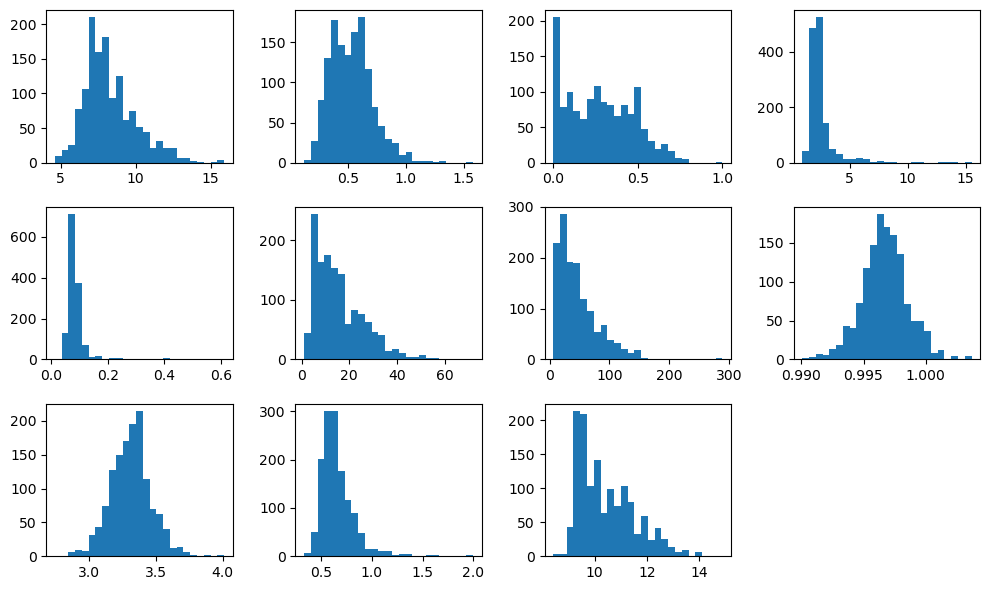

In [12]:
#Dist plot of all features:
# histogram of the data
plt.figure(figsize=(10, 6))
dfg = df.values
dfg = dfg[:, :-1]
for i in range(dfg.shape[1]):
    plt.subplot(3,4,i+1)
    plt.hist(dfg[:,i], bins=25)

plt.tight_layout()
plt.show()

## - Cleaning of The Outliers 

In [13]:
from sklearn.ensemble import IsolationForest

In [14]:
#separate into input and output columns
X = df.iloc[:, :-1] #taking all the rows and all the columns except the last column.
y = df.iloc[:, -1] #taking all the rows and only the last column

In [15]:
#a cleaning of the outliers with a IsolationForest method.
print('dataset before outlier cleaning', X.shape, y.shape)
#call and fit the Isolation Forest detector
iforest = IsolationForest(contamination=0.1).fit(X.values)
yhat = iforest.predict(X.values)
#select all rows that are not outliers
mask = yhat != -1
X = X.loc[mask, :]
y = y.loc[mask]

print('dataset after outlier cleaning:' ,X.shape, y.shape)

dataset before outlier cleaning (1359, 11) (1359,)
dataset after outlier cleaning: (1223, 11) (1223,)


## - Transforms Data Into a Normal Distribution

In [16]:
from sklearn.preprocessing import QuantileTransformer, LabelEncoder, StandardScaler

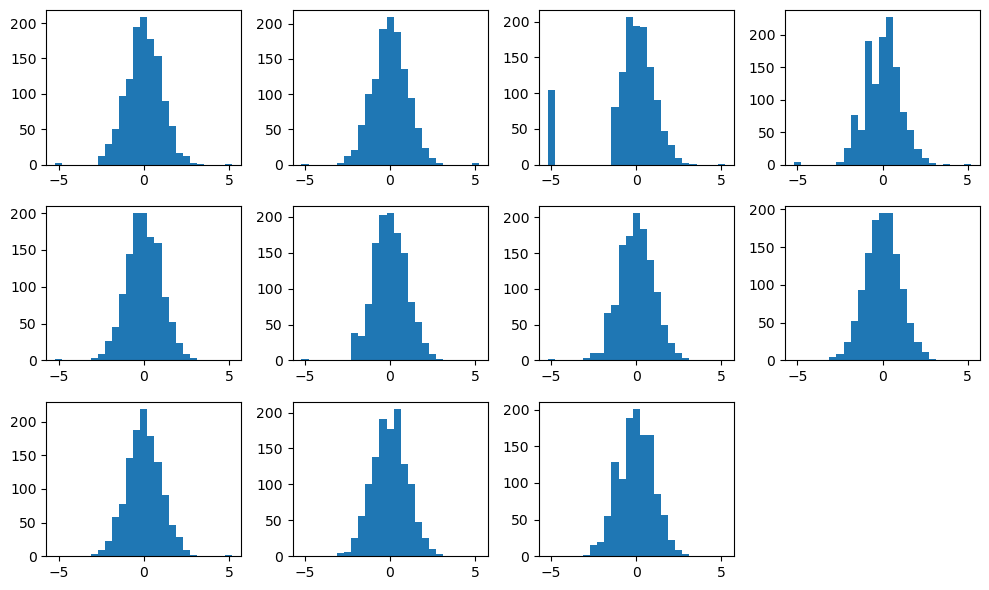

In [17]:
#map data to a normal distribution
qt = QuantileTransformer(n_quantiles=500, output_distribution="normal", random_state=42)

X_trans = qt.fit_transform(X)

# histogram of the transformed data
plt.figure(figsize=(10, 6))

for i in range(X_trans.shape[1]):
    plt.subplot(3, 4, i+1)
    plt.hist(X_trans[:,i], bins=25)
    
plt.tight_layout()
plt.show()

In [18]:
#normality check 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
print(X_trans.shape)

for i in range(X_trans.shape[1]):
    p_val= stats.normaltest(X_trans[:,i])
    print('p-value for {} = {:.4f}'.format(i,p_val[1]))

(1223, 11)
p-value for 0 = 0.0000
p-value for 1 = 0.0000
p-value for 2 = 0.0000
p-value for 3 = 0.0000
p-value for 4 = 0.0000
p-value for 5 = 0.0000
p-value for 6 = 0.0000
p-value for 7 = 0.0002
p-value for 8 = 0.0000
p-value for 9 = 0.0002
p-value for 10 = 0.0001


It looks better, but the normality test shows that the data isn't normal distributed after the transformation.
This means the results from the analysis may be not valid

## - Multicollinearity check

<AxesSubplot: >

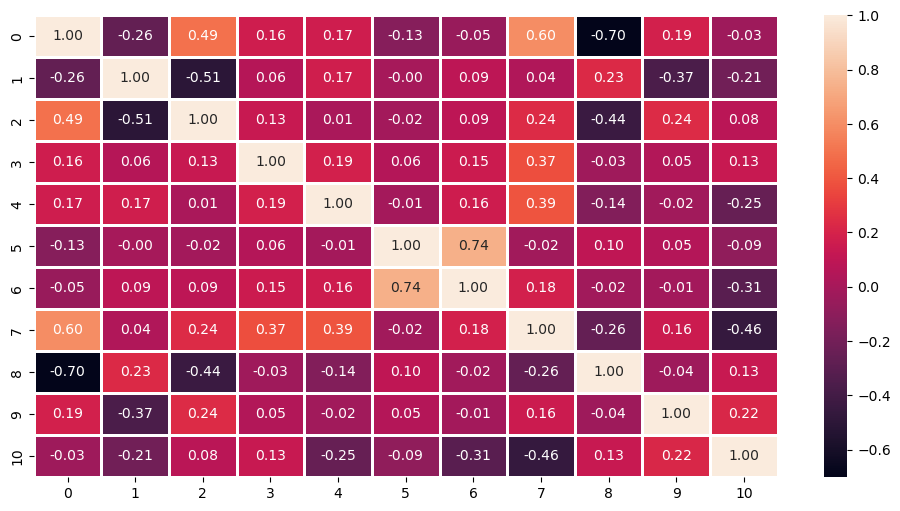

In [20]:
#find correlated columns
plt.figure(figsize=(12,6))
X_trans = pd.DataFrame(X_trans) 
sns.heatmap(X_trans.corr(), annot=True, fmt='.2f', linewidths=2)

In [21]:
# calculating VIF for each feature

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_trans.columns

vif_data["VIF"] = [variance_inflation_factor(X_trans.values, i)
                          for i in range(len(X_trans.columns))]
  
print(vif_data)

    feature       VIF
0         0  4.706101
1         1  1.642849
2         2  1.780189
3         3  1.542094
4         4  1.254917
5         5  2.506988
6         6  2.901774
7         7  4.368412
8         8  2.705304
9         9  1.350637
10       10  2.471927


The dataset is not affected by multicollinearity because VIF(Varaince inflation Factor) values get lower than 10.

## - Classifying

First, we need to perform one hot encoding on the 10-point scale for the dichotomous variable (good wine and rest).

In [22]:
y = pd.DataFrame(y)
pd.columns = ['quality']

In [23]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
y['quality'] = pd.cut(y['quality'], bins = bins, labels = group_names)

In [24]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [25]:
y.head()

,quality
0,bad
1,bad
2,bad
3,bad
5,bad


In [26]:
#Bad becomes 0 and good becomes 1 
y['quality'] = label_quality.fit_transform(y['quality'])

In [27]:
y['quality'].value_counts()

0    1070
1     153
Name: quality, dtype: int64

## - Handeling Imbalanced Data

In [28]:
from imblearn.over_sampling import RandomOverSampler

In [29]:
os =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = os.fit_resample(X, y)

In [30]:
print(X_train_res.shape)
print(y_train_res.shape)

(2140, 11)
(2140, 1)


## Model, predict and solve

Our problem is a classification and regression problem. We want to identify relationships between output (good or bad) and other variables or features (fixed acidity, volatile acidity, etc.). We are also performing supervised learning as we train our model with a given dataset.
<li>Decision Tree</li>
<li>Logistic Regression</li>
<li>SVC with Gaussian RBF Kernel</li>
<li>Random Forest</li>

## - Dataset Train/Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.25, random_state=42)

In [33]:
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1605, 11) Y_train.shape= (1605, 1)
X_test.shape= (535, 11) Y_test.shape= (535, 1)


In [34]:
#Applying Standard scaling to get optimized result
#Feature scalling for SVC
sc = StandardScaler()

In [35]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## - Logistic Regression 

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
# Train and fit the Logistic Regression
logreg = LogisticRegression().fit(X_train, y_train.values.ravel())

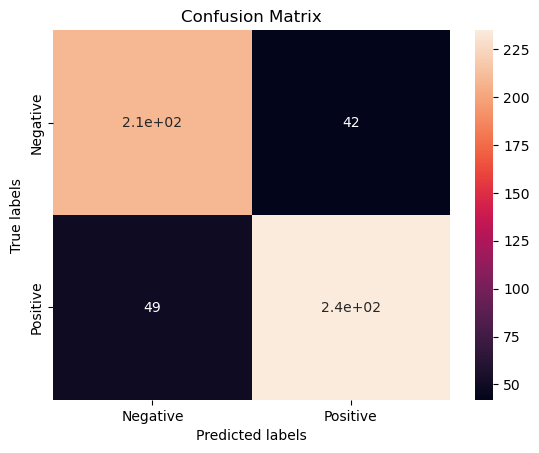

In [38]:
logr_yhat = logreg.predict(X_test)
plot_confusion_matrix(y_test,logr_yhat)

In [39]:
# Evaluate the model's accuracy
ac_logr_train = logreg.score(X_train, y_train)
print("Train set accuracy = %.2f " % ac_logr_train)
ac_logr_test = logreg.score(X_test, y_test)
print("Test set accuracy = %.2f " % ac_logr_test)

Train set accuracy = 0.81 
Test set accuracy = 0.83 


The Logistic Regression gets the test set's accuracy of 83%.

In [40]:
X_train = pd.DataFrame(X_train)
coeff_df = pd.DataFrame()
coeff_df['Feature'] = X_train.columns
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
10,10,0.850629
9,9,0.678961
0,0,0.508223
5,5,0.451433
3,3,0.387451
8,8,0.065134
4,4,-0.080132
2,2,-0.118109
7,7,-0.370016
1,1,-0.700335


<li> Alcohol is highest positivie coefficient, the probability of good wine=1 increases the most </li>
<li> Inversely as volatile acidity increase, probability of good wine=1 decreases the most </li>

## - Dicision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
# Train and fit the DecisionTree
tree_clf = DecisionTreeClassifier(max_depth=5).fit( X_train, y_train.values.ravel())

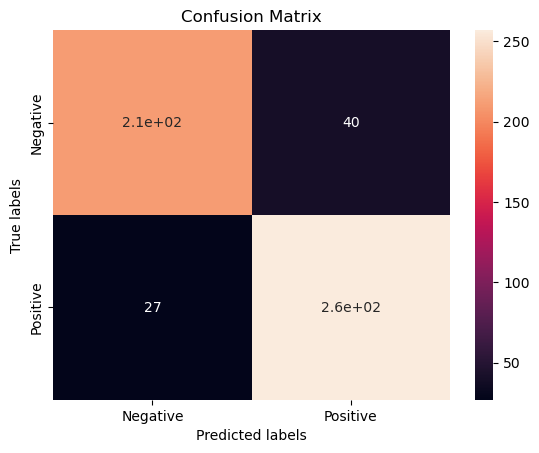

In [43]:
tree_yhat = tree_clf.predict(X_test)
plot_confusion_matrix(y_test,tree_yhat)

In [44]:
# Evaluate the model's accuracy
ac_tree_train = tree_clf.score(X_train, y_train)
print("Train set accuracy = %.2f " % ac_tree_train )
ac_tree_test = tree_clf.score(X_test, y_test)
print("Test set accuracy = %.2f " % ac_tree_test)

Train set accuracy = 0.89 
Test set accuracy = 0.87 


The decision tree gets the test set's accuracy of 87%.

## - SVC with Gaussian RBF Kernel

In [45]:
from sklearn.svm import SVC

In [46]:
# Train and fit the model: SVC with Gaussian RBF Kernel
svc_clf = SVC(kernel="rbf", gamma="auto", C=1, max_iter=-1).fit(X_train, y_train.values.ravel())

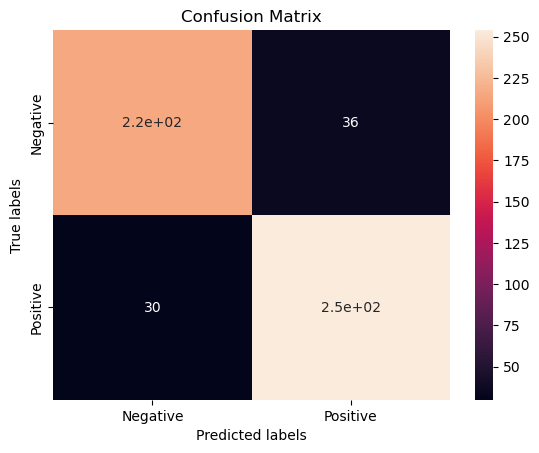

In [47]:
svc_yhat = svc_clf.predict(X_test)
plot_confusion_matrix(y_test,svc_yhat)

In [48]:
# Evaluate the model's accuracy
ac_svc_train = svc_clf.score(X_train, y_train)
print("Train set accuracy = %.2f " % ac_svc_train)
ac_svc_test =  svc_clf.score(X_test, y_test)
print("Test set accuracy = %.2f " % ac_svc_test)

Train set accuracy = 0.89 
Test set accuracy = 0.88 


The test set's accuracy improved from 87% to 88% using SVC with a Gaussian RBF kernel.

## - Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
# Train and fit the model: random forest classifier
rforest_clf = RandomForestClassifier().fit(X_train, y_train.values.ravel())

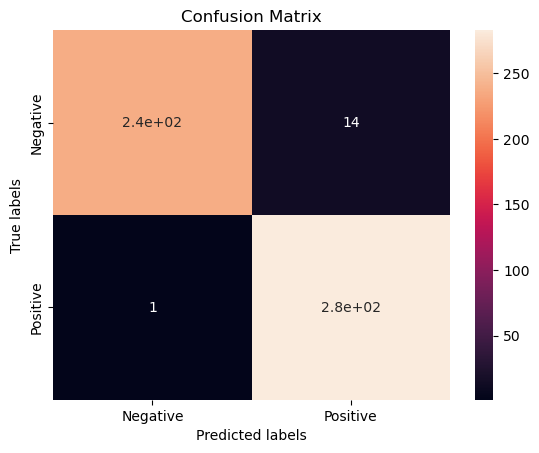

In [51]:
rforest_yhat = rforest_clf.predict(X_test)
plot_confusion_matrix(y_test,rforest_yhat)

In [52]:
# Evaluate the model's accuracy
ac_rf_train = rforest_clf.score(X_train, y_train)
print("Train set accuracy = %.2f " % ac_rf_train )
ac_rf_test = rforest_clf.score(X_test, y_test)
print("Test set accuracy = %.2f " % ac_rf_test )

Train set accuracy = 1.00 
Test set accuracy = 0.97 


Thus, the test set's accuracy improved from 88% to 97% using Random forest.

## Model evaluation

In [53]:
models = pd.DataFrame({
    'Model': ['Dicision tree','Logistic Regression','Support Vector Machines','Random Forest'],
    'Accuracy_Score': [ac_tree_test, ac_logr_test, ac_svc_test, ac_rf_test] })

models.sort_values(by='Accuracy_Score', ascending=False)

,Model,Accuracy_Score
3,Random Forest,0.971963
2,Support Vector Machines,0.876636
0,Dicision tree,0.874766
1,Logistic Regression,0.829907


____

## References
<br>[Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/code?datasetId=4458&sortBy=voteCount)</br>
<br>[Titanic Data Science Solutions](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions)</br>
<br>[Machine Learning and Full-stack Python](https://guopai.github.io/)</br>

____

Gawragod Kuchaiyaphum